<img src='https://matplotlib.org/_static/logo2.png' />

# **Matplotlib for Scientific Plotting**


### Wei Guo, BioHPC
### 2:00 pm, April 23, 2019, NB2.100A

In [ ]:
jupyter nbconvert matplotlib.ipnb --to slides --SlidesExporter.reveal_scroll=True

<img src='https://matplotlib.org/_static/logo2.png' height=30 />

# **Matplotlib for Scientific Plotting**

### - Python based library for 2D and 3D plottings

    Versatile plotting tools in modules
    

### - Can produce publication quality figures

    You have full control of the figures

### - High compatiability

    Works with Windows and Linux platforms
    
    Works with applications like Jupyter Notebook, Spyder with IPython kernels, 
    
    Interactive 

# Framework & Heirarchy


### - Top level with `matplotlib.pyplot`, this is what we mostly need

    pyplot is the state-machine environment
    
    Elements are added to the current fig object

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x,y)

plt.title('This is the title')

plt.xlabel('X label')

### - Lower levels

    Get control of the figure through Figure, Axes, Axis and artists 
    
    Axes is the interface to Axis, title, labels, legends, ticks, and etc.
    
    These are the actual code under the hood


In [ ]:
# Get the current Figure()
fig = plt.gcf()

# Get the axes of the current Figure()
axes = plt.gca()

# The life of a plotting
<img src='https://matplotlib.org/_images/sphx_glr_anatomy_001.png' height=1 />

### Example: 
Plot a Gaussian function with choice of $\mu$, $\sigma$. $x$ range is $[-\pi$, $3\pi)$ with 1000 elements. ($\mu = \pi, \sigma = 0.4\pi$).

\begin{equation*}
g(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x-\mu)^2}{2\sigma^2}
\end{equation*}

Shadow the 95% confidence intervals for two tail tests, given:
$x = \sqrt{2}\sigma{erf}^{-1}(2z-1)+\mu$

## Prepare data using Numpy arrays and Scipy functions

Gaussian: $g(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x-\mu)^2}{2\sigma^2}$  Confidence: $x = \sqrt{2}\sigma{erf}^{-1}(2q-1)+\mu$

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.special import erfinv, erf

#def gaussian(x, mu, sigma):
#    return 1. / np.sqrt(2*np.pi*sigma*sigma) * np.exp(-(x-mu)**2/2./sigma/sigma) 

start = - np.pi
end   = 3 * np.pi
N     = 1000
mu    = np.pi
sigma = .4 * np.pi

# prepare the arrays using numpy and scipy APIs
x = np.arange(start, end, (end-start)/N, float)
y = norm.pdf(x, loc=mu, scale=sigma)

# get the percent point use ppf
lt, rt = 0.025, 0.975
x_lt = norm.ppf(lt, loc=mu, scale=sigma)
x_rt = norm.ppf(rt, loc=mu, scale=sigma)
# get the cumulative distribution function
CDF = norm.cdf(x, loc=mu, scale=sigma)

## Basic Matplotlib plotting with pyplot

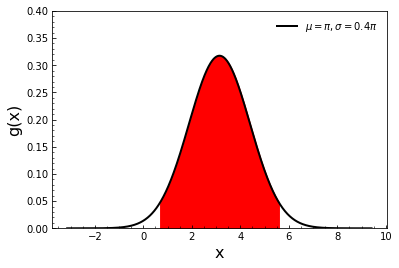

In [2]:
# matplotlib needs this line to work with Jupyter Notebook
%matplotlib inline      
import matplotlib.pyplot as plt

plt.plot(x, y, 'k-', linewidth=2)
plt.fill_between(x, y, 0, where=(x >= x_lt) & (x <= x_rt), color='r')

# set a font style for reuse
fontdict = {'family': 'sans-serif', 'color': 'black', 'weight': 'normal', 'size': 16}

plt.xlabel('x', fontdict=fontdict)
plt.ylabel('g(x)', fontdict=fontdict)
plt.minorticks_on()
plt.tick_params(axis='both',which='both',direction="in")  

plt.legend([r'$\mu = \pi, \sigma = 0.4 \pi$'], frameon=False)
plt.ylim(0, .4)

#plt.savefig('norm-plt.pdf', dpi=300, format='pdf')
plt.show()

## Everything is accessed via API for fine control


```python
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
```

### `fig`:   the `matplotlib.figure.Figure` object

##### `methods: add_axes() add_subplot() savefig() `

### `ax`:  the `matplotlib.axes.Axes` object
##### `methods: plot() scatter() imshow() get_xaxis() set_xlabel() legend()`

#### `Axes`: contains the figure elements of `Axis, Tick, Text` and etc



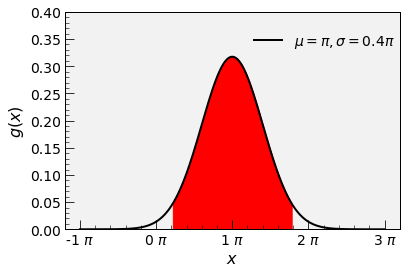

In [47]:
fig, ax = plt.subplots()

fig.set_size_inches(6, 4)

ax.plot(x/np.pi, y, 'k-', linewidth=2, label=r'$\mu = \pi, \sigma = 0.4 \pi$')

ax.fill_between(x/np.pi, y, 0, where=(x >= x_lt) & (x <= x_rt), color='r')

ax.set_facecolor('#f2f2f2')

ax.set_ylim(0,.4)         # set ylimit

ax.legend(loc=(.55,.8), prop={'family':'sans serif', 'size':14}, frameon=False)

# set label and ticks style
ax.xaxis.set_label_text("$x$", fontdict=fontdict)
ax.yaxis.set_label_text("$g(x)$", fontdict=fontdict)

import matplotlib.ticker as tck
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

ax.tick_params(axis='both', which='major', direction='in', length=9, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', length=4)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontname("sans serif")
    tick.set_fontsize(14)
    
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)

plt.show()

## Axes gives interfaces for each layer of plot

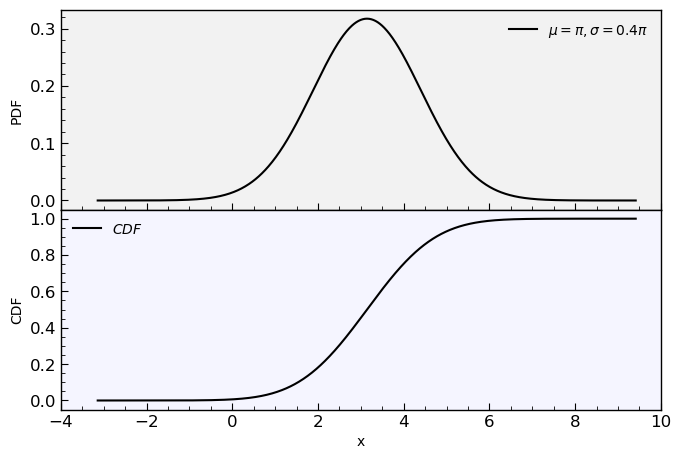

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig = plt.figure(num=2, figsize=(6,4),dpi=100, edgecolor='black', frameon=True)

ax1 = fig.add_axes([0.,.5,1.,.5])
ax2 = fig.add_axes([0.,0.,1.,.5], sharex=ax1)

ax1.plot(x, y, 'k-', label=r'$\mu = \pi, \sigma = 0.4 \pi$')
ax2.plot(x,CDF, 'k-', label=r'$CDF$')

ax1.set_facecolor('#f2f2f2')
ax2.set_facecolor('#f5f5ff')

ax1.set_ylabel('PDF')
ax2.set_xlabel('x')
ax2.set_ylabel('CDF')

ax1.tick_params(labelbottom=False) 

for i in [ax1, ax2]:
    i.set_xlim(-4,10)
    i.tick_params(axis='both', which='major', direction='in', length=5, labelsize=12)
    i.tick_params(axis='both', which='minor', direction='in', length=3)
    i.xaxis.set_minor_locator(tck.AutoMinorLocator())
    i.yaxis.set_minor_locator(tck.AutoMinorLocator())    
    i.legend(frameon=False)
    
    for axis in ['top','bottom','left','right']:
        i.spines[axis].set_linewidth(1)


Text(0.5, 0, 'x')

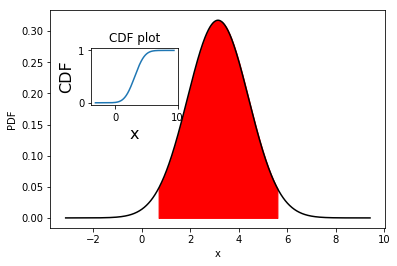

In [56]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'k-')
plt.fill_between(x, y, 0, where=(x >= x_lt) & (x <= x_rt), color='r')
plt.xlabel('x')

# get current Axes
ax1 = plt.gca()
ax1.set_ylabel('PDF')

# get current figure
fig = plt.gcf()

# creating a new axes
ax2 = fig.add_axes([.22,.55,.2,.2])
ax2.plot(x,CDF)

ax2.set_title('CDF plot')
plt.ylabel('CDF',fontdict=fontdict)
plt.xlabel('x',fontdict=fontdict)


## The heirarchy

<img src="heirarchy.png" />

## The big picture
<img src="https://matplotlib.org/_images/inheritance-65ce2e47a854f0550975f5a2d9a9335356c2af71.png" />

## Matplotlib works with Numpy n-d arrays and Pandas dataframes

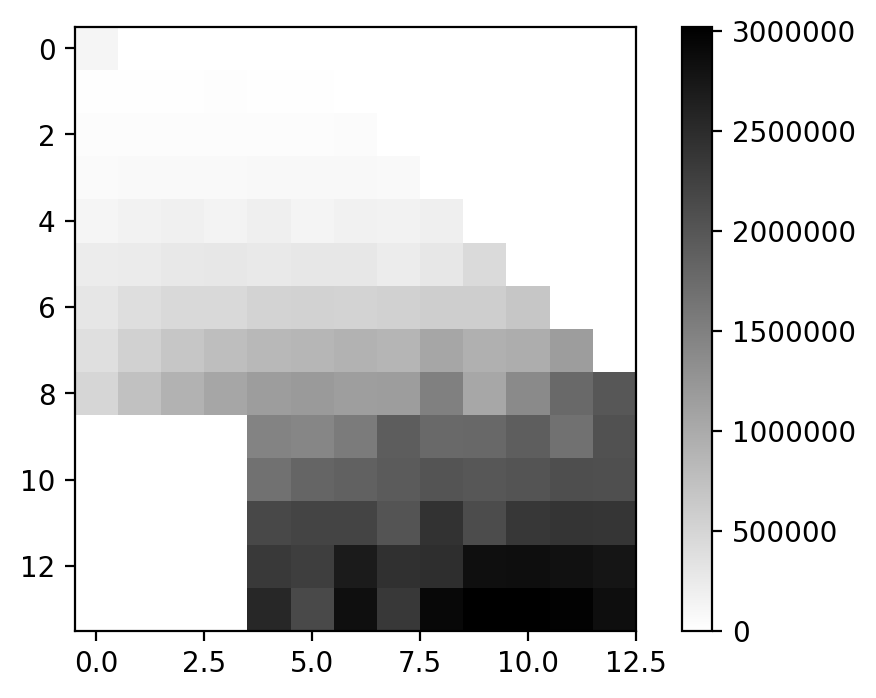

In [57]:
import pandas as pd

df = pd.read_excel('write_report.xlsx', header=0, index_col=0)
mymap = plt.imshow(df, aspect='equal', cmap='binary')
plt.colorbar(mymap)

plt.gcf().set_size_inches(6,4)
plt.gcf().set_dpi(200)

## Matplotlib works with images

image data type:  float32 , data shape:  (357, 535, 3)


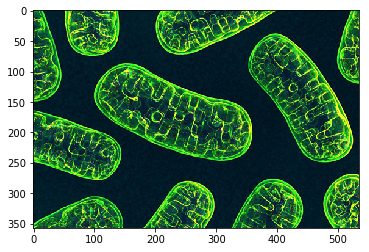

Before:  [0.08627451 0.3254902  0.21568628]


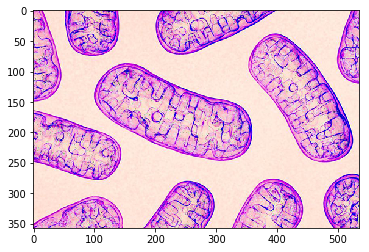

After:  [0.9137255  0.67450976 0.78431374]


In [58]:
import matplotlib.image as mpimg

# load the interested image
img=mpimg.imread('cell.png')
print('image data type: ', img.dtype, ', data shape: ', img.shape)

fig1 = plt.figure()
plt.imshow(img)
plt.show()
print('Before: ', img[0][0])

# do a simple inverse operation
for i in np.arange(img.shape[0]):
    for j in np.arange(img.shape[1]):
        for k in np.arange(img.shape[2]):
            img[i][j][k] = 1. - img[i][j][k]

fig2=plt.figure()
plt.imshow(img)
plt.show()
print('After: ', img[0][0])

## `mplot3d` for 3D plot

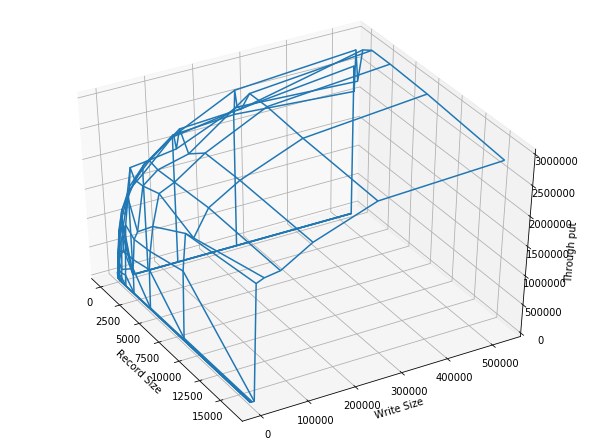

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_excel('write_report.xlsx', header=0, index_col=0)

x = df.columns
y = df.index

x,y = np.meshgrid(x,y)

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.set_xlabel('Record Size')
ax.set_ylabel('Write Size')
ax.set_zlabel('Through put')

ax.plot_wireframe(x, y, df)

ax.view_init(40,-30)

## Matplotlib works with movies

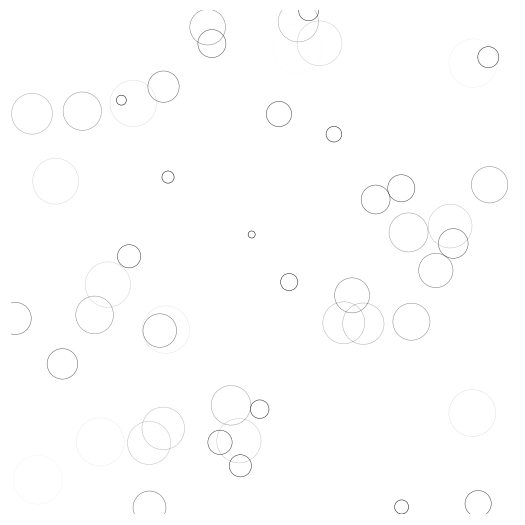

In [60]:
# you might want to install ffmpeg by if you see no MovieWriters error
# $ conda install ffmpeg --channel conda-forge

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=(7,7), facecolor='white')   # New figure with white background

ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)   # New axes over the whole figure, no frame and a 1:1 aspect ratio

n = 50         # Number of ring
size_min = 50
size_max = 50*50

P = np.random.uniform(0,1,(n,2))      # Ring position

C = np.ones((n,4)) * (0,0,0,1)    # Ring colors

C[:,3] = np.linspace(0,1,n)    # Alpha color channel goes from 0 (transparent) to 1 (opaque)

S = np.linspace(size_min, size_max, n)      # Ring sizes

scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')       # Scatter plot

ax.set_xlim(0,1), ax.set_xticks([])      # Ensure limits are [0,1] and remove ticks
ax.set_ylim(0,1), ax.set_yticks([])

def update(frame):
    global P, C, S

    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)         # Every ring is made more transparent

    S += (size_max - size_min) / n            # Each ring is made larger

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    scat.set_edgecolors(C)        # Update scatter plot object
    scat.set_sizes(S)
    scat.set_offsets(P)

    return scat             # Return the modified object

# create my animation as a FuncAnimation object
animation = FuncAnimation(fig, update, frames=500, interval=10,  blit=False)

# Save to mp4 movie on disk
animation.save('mydrips.mp4', codec='h264')

# play the animation
HTML(animation.to_html5_video())

# Seaborn


### A Python data visualization library based on matplotlib. 

### A high-level interface for drawing attractive and informative statistical graphics.

### Seaborn is very convenient for visualization and exploration 

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks')

tips = sns.load_dataset('tips')
print(tips[:10])

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


## Seaborn has customized namespace


#### Under the hood, Seaborn is wrapping Matplotlib plots with customization, so *less code for users!*

#### Example:  `seaborn.scatterplot vs pyplot.scatter`

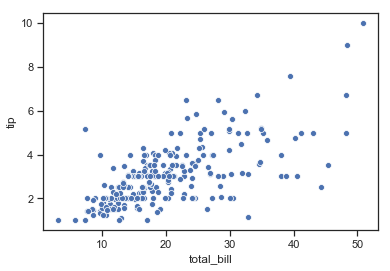

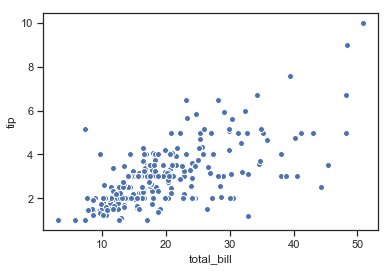

In [62]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

###### The line above me equals to the lines below me ########

fig = plt.figure()
plt.scatter(tips['total_bill'], tips['tip'], edgecolors='white')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

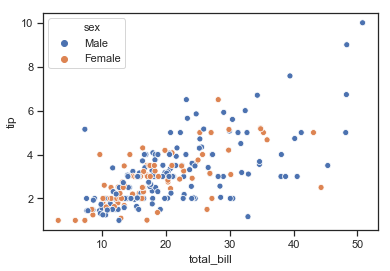

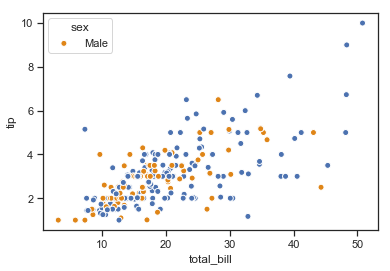

In [63]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

###### The line above me equals to the lines below me ########

colors = ['#4C72B0' if i == 'Male' else '#df8517' for i in tips['sex'] ]
fig = plt.figure()
plt.scatter(tips['total_bill'], tips['tip'], c=colors, edgecolors='white')

plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend(['Male', 'Female'], title='sex')
plt.show()

## Seaborn is packaged with statistical tools

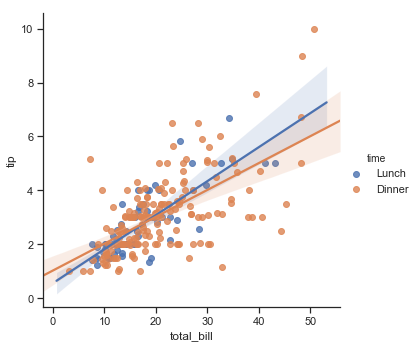

In [64]:
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips)
plt.show()

## Convenient filter-plot-compare with FacetGrid

In [65]:
print(tips[:10])

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


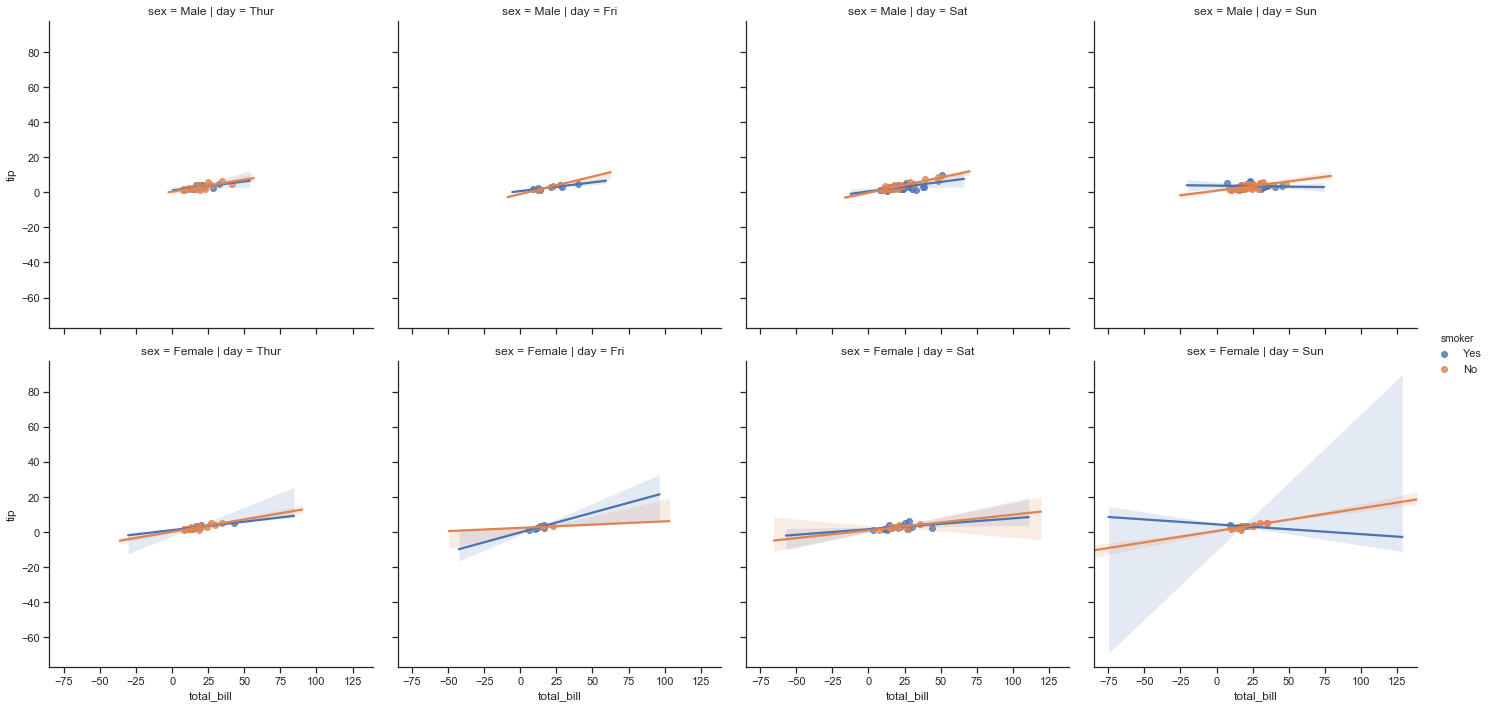

In [66]:
sns.lmplot(x='total_bill', y='tip', row='sex', col='day', hue='smoker', data=tips)
plt.show()

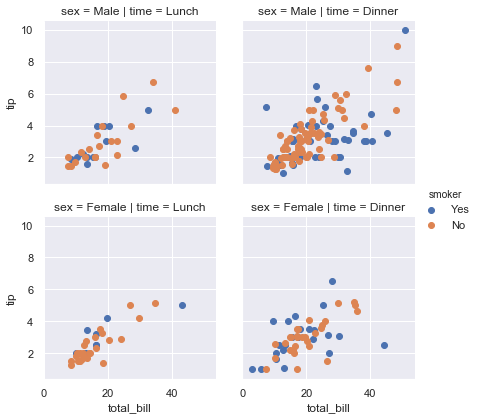

In [67]:
sns.set(style='darkgrid')

g = sns.FacetGrid(tips, row='sex', col='time', hue='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip',  data=tips)
g.add_legend()
plt.show()

#### [Warning] The fitting parameters are not disclosed by Seaborn! Be careful to use it.

## Customize Seaborn plot style

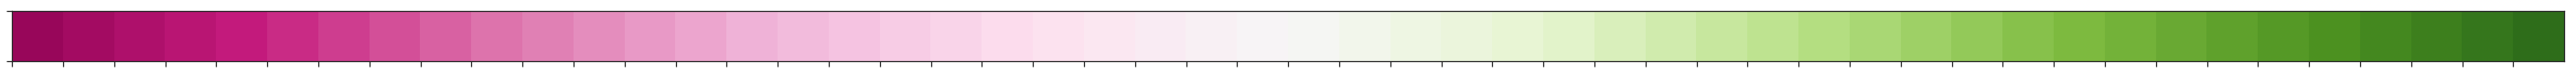

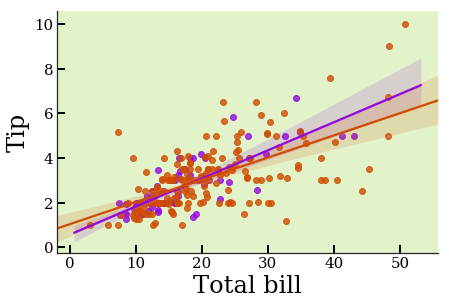

In [73]:
a = sns.color_palette(palette='PiYG', n_colors=50)
sns.palplot(a)    # this will generate the palette with 50 colors. 

# general setting, the context, font and size
sns.set(context='notebook', style='ticks',
        font='serif', font_scale=2)

sns.set_style('ticks', {'figure.facecolor': 'white',
                        'axes.facecolor': a[30],  # pick one color as facecolor
                        'axes.labelcolor': 'black',
                        'font.family': 'serif',
                       })

g = sns.lmplot(x='total_bill', y='tip', hue='time', data=tips, palette='gnuplot',
                height=5, aspect=1.4,legend=False)

# g.ax is the matplotlib.axes.Axes object
g.ax.tick_params(direction='in',
                 length=8, width=2,
                 labelsize=15, colors='black',
                 labelcolor='black')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

## Excerise: Plot a $sinc(x,y)$ (Mexican hat) function in 2 D with both x and y range [-50, 50].

\begin{equation*}
sinc(x,y) = \frac{\sin{\sqrt{(x^2 + y^2)/100}}}{\sqrt{x^2 + y^2}}
\end{equation*}

<img src="mexican_hat.png"/>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import sinc
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-50, 50, num=100)
y = x

z = np.zeros(shape=(100,100))

for i, x1 in np.ndenumerate(x):
    for j,y1 in np.ndenumerate(y):
        z[i][j] = np.sinc(np.sqrt((x1*x1 + y1*y1)/100))
        
x, y = np.meshgrid(x,y)

fig = plt.figure(figsize=(6,4), dpi=200)

ax = fig.gca(projection='3d')

ax.plot_surface(x,y,z, rstride=3, cstride=3, cmap=plt.cm.coolwarm)

ax.view_init(40,80)